In [1]:
import gym
import numpy as np
import matplotlib.pyplot as plt
from gym import error, spaces, utils
from gym.utils import seeding

In [2]:
class WalkingRobotEnv(gym.Env):
    '''
    Discription:
        This is the env of HW02, Ex03.
    Observation:
        There are 16 states as shown in img/
    Actions:
        There are 4 actions:
        0: Move right leg up or down
        1: Move right leg back- or forward
        2: Move left leg up or down
        3: Move left leg back- or forward
    '''
    metadata = {'render.modes': ['human']}

    def __init__(self):
        self.action_space = spaces.Discrete(4) 
        self.observation_space = spaces.Discrete(1) # the observation is only 1 dimension
        
        self.delta = np.matrix([[2,4,5,13], 
                               [1,3,6,14],
                               [4,2,7,15],
                               [3,1,8,16],
                               [6,8,1,9],
                               [5,7,2,10],
                               [8,6,3,11],
                               [7,5,4,12],
                               [10,12,13,5],
                               [9,11,14,6],
                               [12,10,15,7],
                               [11,9,16,8],
                               [14,16,9,1],
                               [13,15,10,2],
                               [16,14,11,3],
                               [15,13,12,4]])
        
        self.reward_mat = np.matrix(  [[0, -1, 0, -1],
                                       [0, 1, -1, 0],
                                       [1, -1, -1, -1],
                                       [-1, -1, 1, -1],
                                       [-1,-1, -1, 1],
                                       [0, -1, 0, -1],
                                       [0, -1, 0, -1],
                                       [-1, 1, -1, -1],
                                       [-1, -1, 1, -1],
                                       [0, -1, 0, -1],
                                       [0, -1, 0, -1],
                                       [-1, 0, -1, -1],
                                       [1, -1, -1, -1],
                                       [-1, -1, -1, 1],
                                       [-1, -1, -1, 1],
                                       [0, -1, 0, -1]])
        self.state=None     
        self.ob_img = [np.ones([2,2],dtype=np.float)]*16
        
    def step(self, action):
        state = self.state
        reward = self.reward_mat[state-1,action]
        state = self.delta[state-1,action]
        self.state = state
        return self.state, reward
        
    def reset(self,state=None):
        if state is None:
            self.state = np.random.randint(1,16)
        else:
            self.state = state
        self.ob_img = [np.ones([2,2],dtype=np.float)]*16
        return self.state
    
    def render(self,t=None,plot_process=True):
        s = self.state
        stat_img = plt.imread('./img/step%s.png'%str(s))
        self.ob_img[t] = stat_img
        if plot_process and t==15:
            fig=plt.figure(figsize=(18,18))
            fig.subplots_adjust(hspace=0.4, wspace=0.5)
            for i in range(16):
                ax = fig.add_subplot(1,16,i+1)
                ax.set_axis_off()
                ax.imshow(self.ob_img[i],cmap='gray',vmax=1,vmin=0)
                plt.tight_layout()

In [28]:
class QAgent:
    def __init__(self):
        self.qTable = np.ones([16,4]) # initial q table
        self.policy = np.ones([16,],dtype=int) # initial policy
        
    def __call__(self,env,epoch=100,eps=0.2,alpha=0.9,gamma=0.7):
        policy = self.policy
        qTable = self.qTable
        s = env.reset()
        for _ in range(epoch):
            # s = env.reset()
            print("############## Episode %s ################"%str(_+1))
            for t in range(16):
                if np.random.uniform() > eps: # epsilon greedy policy 
                    policy[s-1] = qTable[s-1].argmax()
                else:
                    policy[s-1] = np.random.randint(0,3) #if less than eps, take action randomly
                # print(policy[s-1])
                s_nxt, r = env.step(action=policy[s-1])
                qTable[s-1,policy[s-1]] = qTable[s-1,policy[s-1]]+alpha*(r+gamma*qTable[s_nxt-1].argmax()-qTable[s-1,policy[s-1]])
                # print(qTable[s-1,policy[s-1]],qTable[s_nxt-1].argmax())
                s = s_nxt           
                env.render(t)
                plt.pause(1)
        self.qTable = qTable
        return qTable

In [29]:
env = WalkingRobotEnv()

In [30]:
QL = QAgent()

############## Episode 1 ################


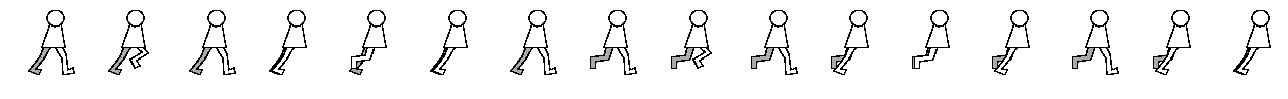

############## Episode 2 ################


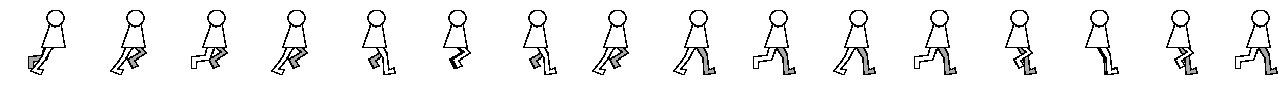

############## Episode 3 ################


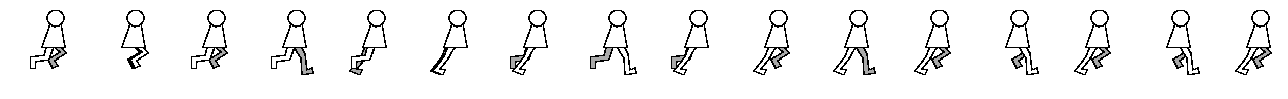

############## Episode 4 ################


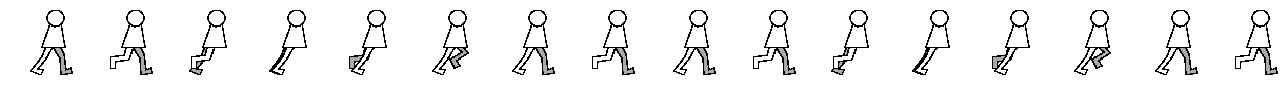

############## Episode 5 ################


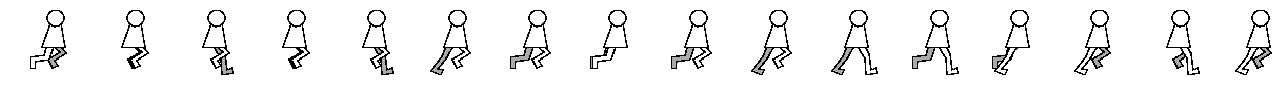

############## Episode 6 ################


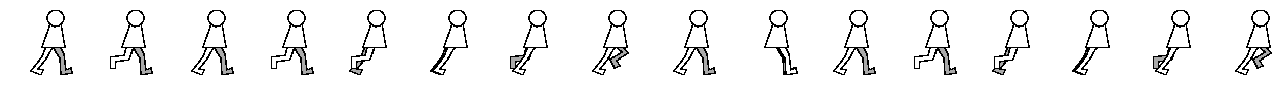

############## Episode 7 ################


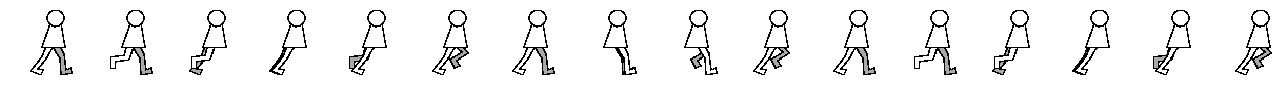

############## Episode 8 ################


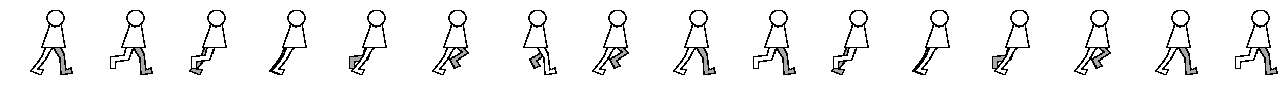

############## Episode 9 ################


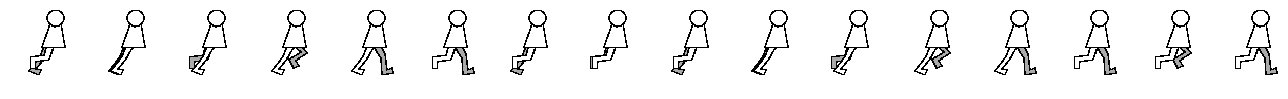

############## Episode 10 ################


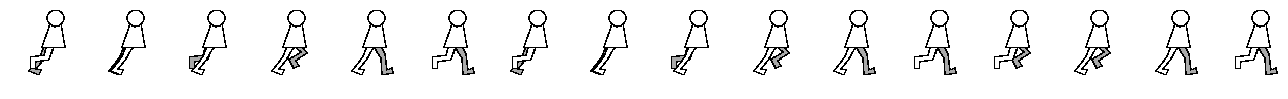

############## Episode 11 ################


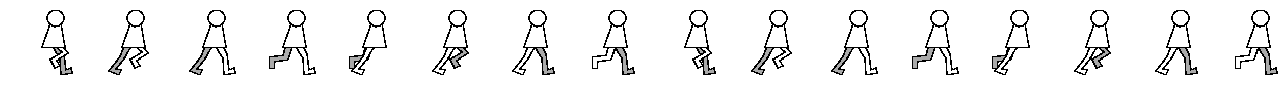

############## Episode 12 ################


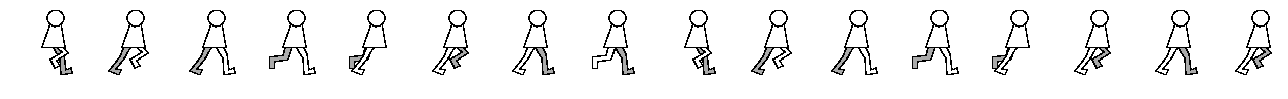

############## Episode 13 ################


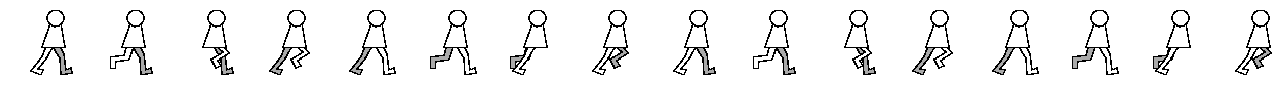

############## Episode 14 ################


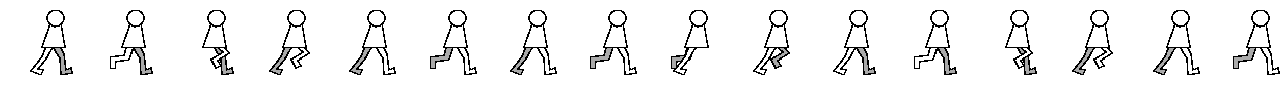

############## Episode 15 ################


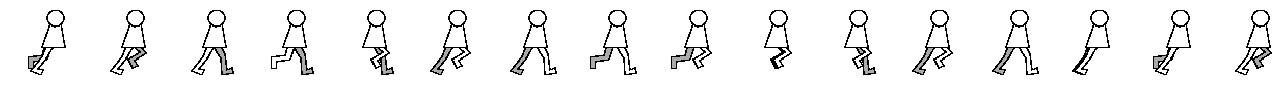

############## Episode 16 ################


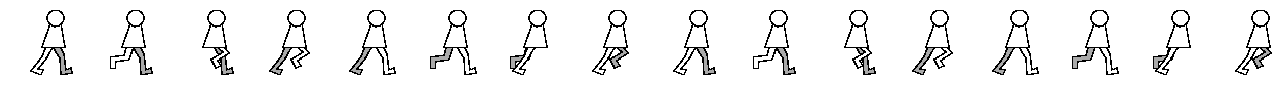

############## Episode 17 ################


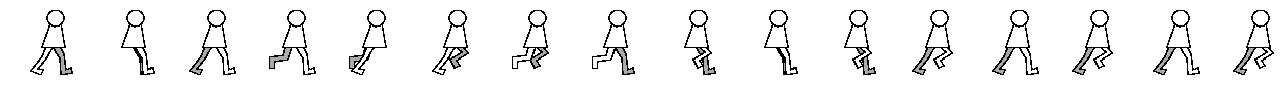

############## Episode 18 ################


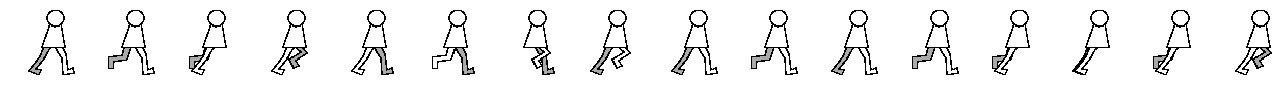

############## Episode 19 ################


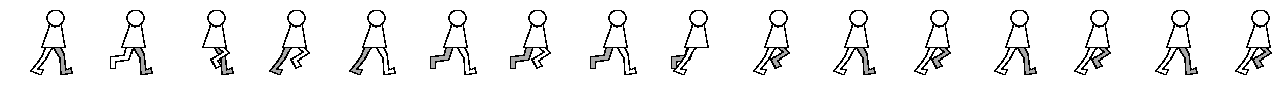

############## Episode 20 ################


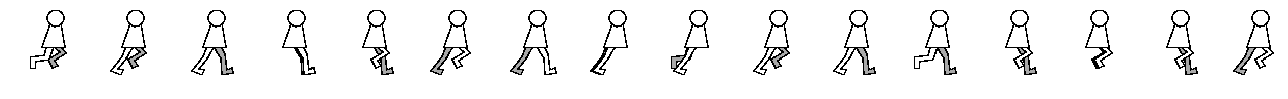

############## Episode 21 ################


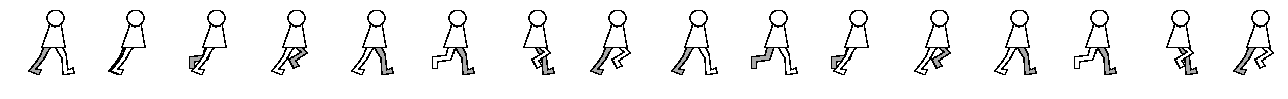

############## Episode 22 ################


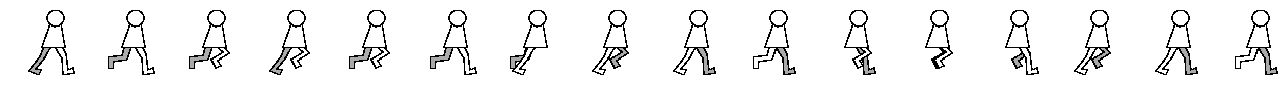

############## Episode 23 ################


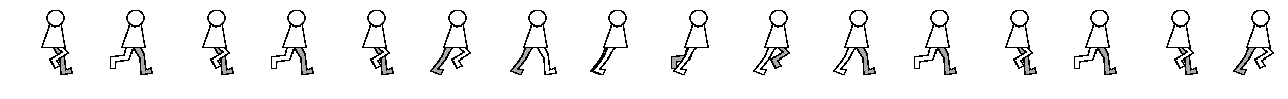

############## Episode 24 ################


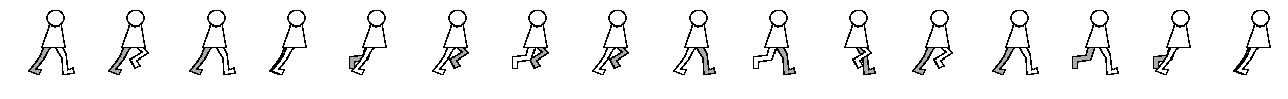

############## Episode 25 ################


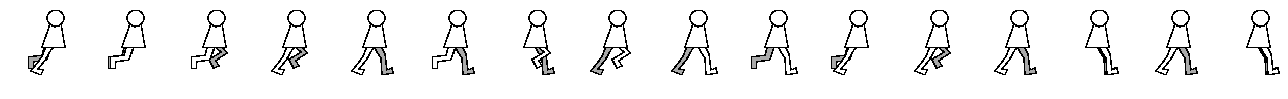

############## Episode 26 ################


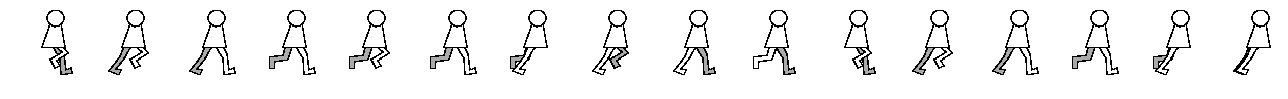

############## Episode 27 ################


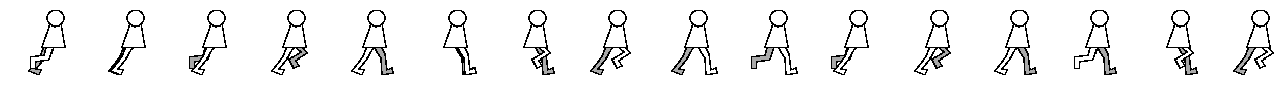

############## Episode 28 ################


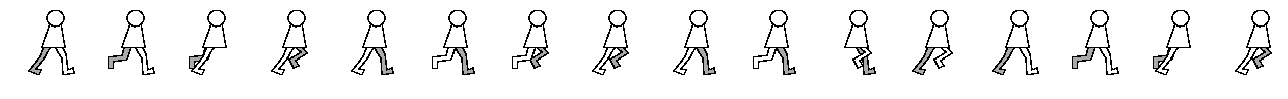

############## Episode 29 ################


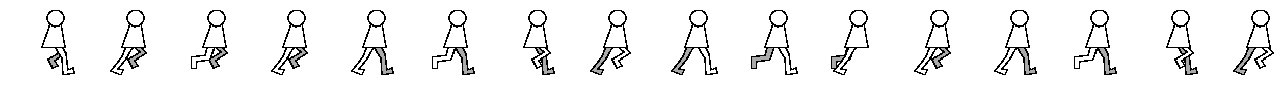

############## Episode 30 ################


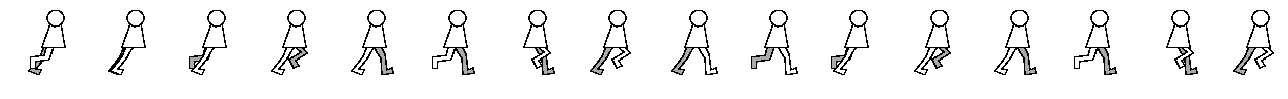

############## Episode 31 ################


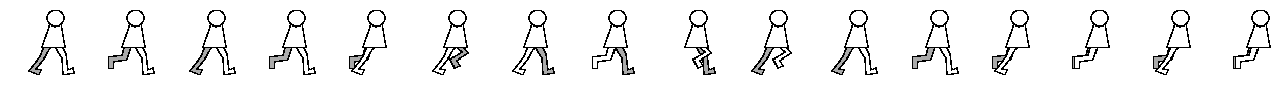

############## Episode 32 ################


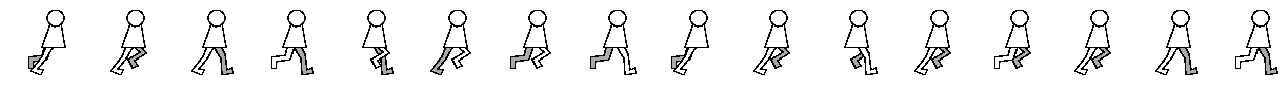

############## Episode 33 ################


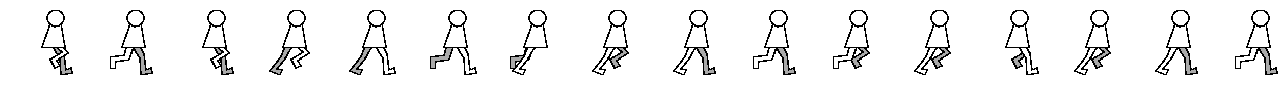

############## Episode 34 ################


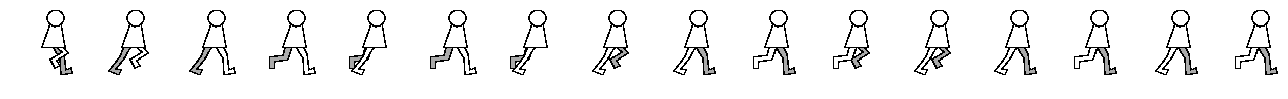

############## Episode 35 ################


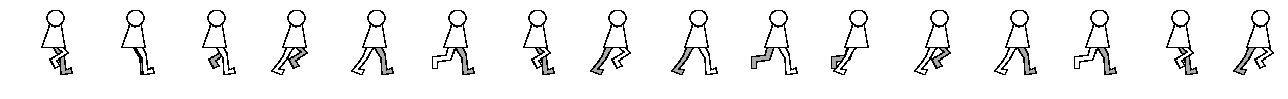

############## Episode 36 ################


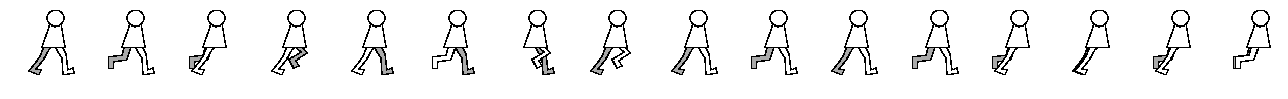

############## Episode 37 ################


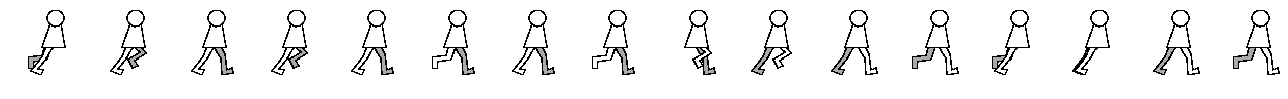

############## Episode 38 ################


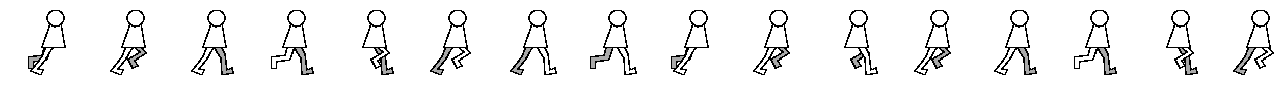

############## Episode 39 ################


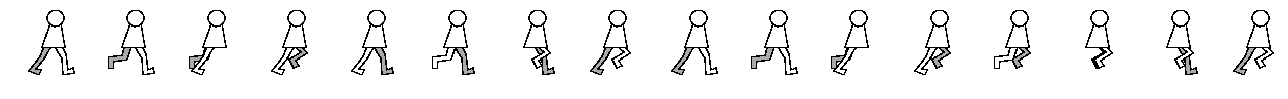

############## Episode 40 ################


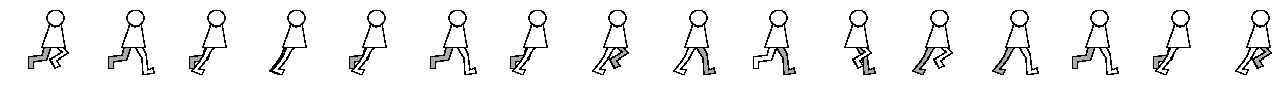

############## Episode 41 ################


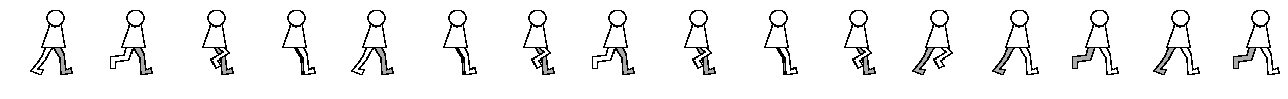

############## Episode 42 ################


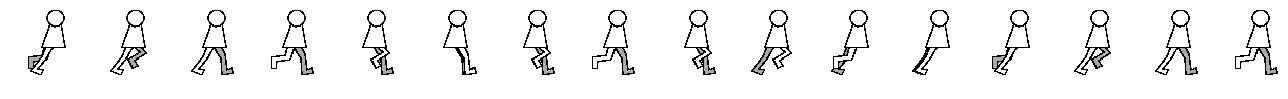

############## Episode 43 ################


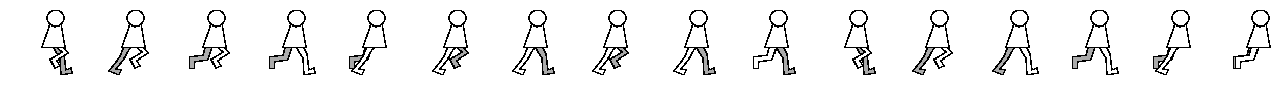

############## Episode 44 ################


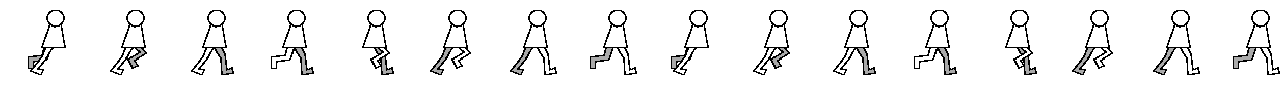

############## Episode 45 ################


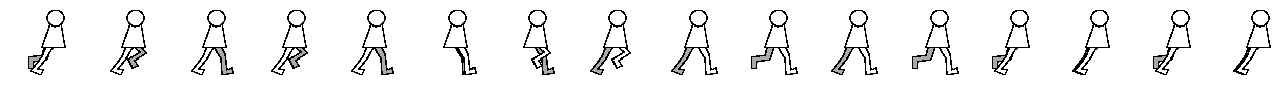

############## Episode 46 ################


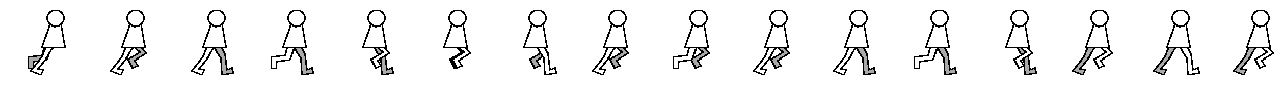

############## Episode 47 ################


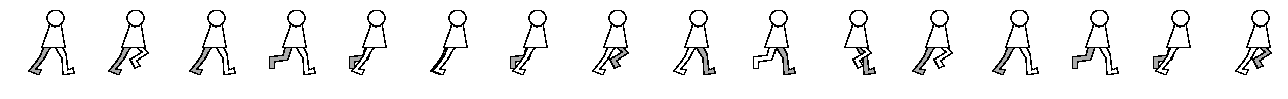

############## Episode 48 ################


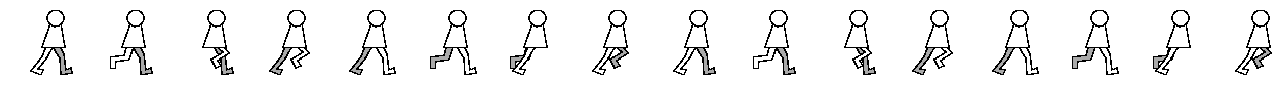

############## Episode 49 ################


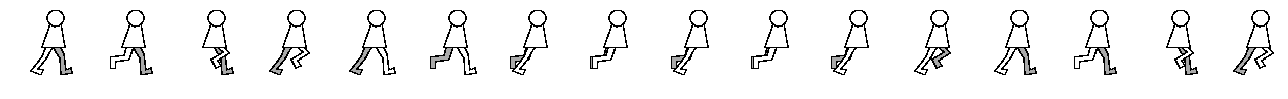

############## Episode 50 ################


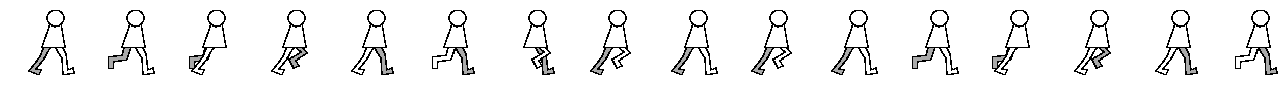

[[ 0.01        0.406       2.1         1.        ]
 [ 1.4         1.          0.46        1.        ]
 [ 2.4        -0.98       -0.999917    1.        ]
 [-0.9999998   0.399988    1.7         1.        ]
 [-0.99999809 -0.29987     0.4         2.4       ]
 [ 2.09999863  0.46        0.1        -0.8       ]
 [ 0.70000003 -0.17        0.01        0.46      ]
 [-0.99809     3.1         0.4000006   1.        ]
 [-0.99999872 -0.30000001  1.          1.        ]
 [ 1.4         0.3943      0.8389      1.        ]
 [ 0.7003      0.46        2.099926    1.        ]
 [-0.8         1.4         1.          1.        ]
 [ 1.7        -0.99999798  0.40000001  1.        ]
 [-0.99998     1.1        -0.99860057  1.        ]
 [-0.999998   -0.29999924  0.40006     1.        ]
 [ 2.09999999 -0.998       0.703       0.46      ]]


In [31]:
qT = QL(env,epoch=50)
print(qT)

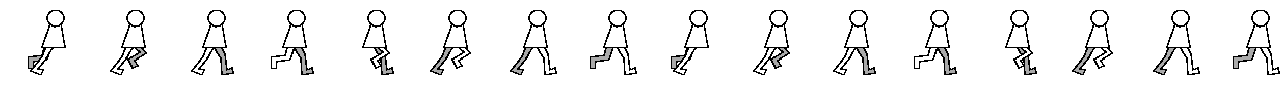

In [32]:
s=env.reset(state=8)
for t in range(16):
    action = qT[s-1].argmax()
    s, reward = env.step(action)
    env.render(t=t)
plt.pause(1)

In [ ]:
''' for the test of env
state=dict()
for i in range(16):
    state.update({"s%s"%(i+1) : plt.imread("./gym-WR/gym_WR/envs/img/step%s.png"%(i+1))})
    
env.reset()
for i_episode in range(20):
    ob_img=[0]*16
    observation = env.reset()
    for t in range(16):
        #print(t)
        action = env.action_space.sample()
        observation, reward = env.step(action)
        env.render(t=t)
    plt.pause(1)
'''